# 2022 Optiver Quantitative Researcher Application - Puzzle Solution

## Question

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?

3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.

## Solution

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Approach

In order to solve this problem, we randomly generate various scenarios regarding the possible direction in which the ant could move at each step, in order to simulate the ant's complete path. 

We approach Parts 1 and 3 by calculating the average time across successively larger number of simulations (1000, 2000, 3000, ... , 10,000) to find the number of seconds towards which the average time converges. 

For part 2, since the food is located on a diagonal line which extends infinitely across both directions, the average time is infinite. That said, we provide an estimate of the percentage of simulations in which the ant reaches its food in 60, 120, 180, ..., 300 seconds.

As mentioned in the question, we assume a speed of 10cm per second.

In [2]:
simulations_lst = [i*1000 for i in range(1, 11)]
speed = 10

### Part 1

In [3]:
#1 for North, 2 for South, 3 for East, 4 for West
food_loc1 = 20
avg_time1 = []

for simulations in simulations_lst:
    position = np.zeros(shape = (simulations, 2))
    time = np.zeros(shape = (simulations, 1))
    
    while True:
        rand_dir = np.random.randint(low = 1, high = 5, size = simulations)

        for i in range(simulations):
            if np.any(abs(position[i]) == food_loc1): continue
            
            else:
                if rand_dir[i] == 1: position[i, 0] += speed
                elif rand_dir[i] == 2: position[i, 0] -= speed
                elif rand_dir[i] == 3: position[i, 1] += speed
                elif rand_dir[i] == 4: position[i, 1] -= speed

                time[i, 0] += 1

        food_reached = np.any(abs(position) == food_loc1, axis = 1)
        food_reached_allsims = np.all(food_reached)

        if food_reached_allsims: break
        
    avg_time1.append(np.mean(time))
    #print(position)

In [4]:
avg_time1

[4.429,
 4.464,
 4.532666666666667,
 4.52575,
 4.5646,
 4.525666666666667,
 4.534285714285715,
 4.5,
 4.546111111111111,
 4.4585]

In [5]:
np.mean(avg_time1)

4.508058015873017

Text(0, 0.5, 'Average time to reach food (seconds)')

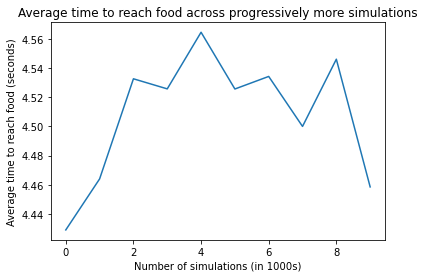

In [6]:
plt.plot(avg_time1)

plt.title('Average time to reach food across progressively more simulations')
plt.xlabel('Number of simulations (in 1000s)')
plt.ylabel('Average time to reach food (seconds)')

As shown in the above plot, the average time tends the ant takes to reach its food tends to converge to 4.5 seconds. This is also validated by the mean of the average time across all simulation sets. **Therefore, it takes 4.5 seconds on average for the ant to reach its food if it is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill.**

### Part 2

In [13]:
food_loc2 = 10
time_lst = [60, 120, 180, 240, 300]
simulations2 = 1000

for t in time_lst:
    position = np.zeros(shape = (simulations2, 2))
    
    for time in range(t):
        rand_dir = np.random.randint(low = 1, high = 5, size = simulations2)

        for i in range(simulations2):
            if (position[i, 0] + position[i, 1]) == 10: continue

            else:
                if rand_dir[i] == 1: position[i, 0] += speed
                elif rand_dir[i] == 2: position[i, 0] -= speed
                elif rand_dir[i] == 3: position[i, 1] += speed
                elif rand_dir[i] == 4: position[i, 1] -= speed


        food_reached = (position[:, 0] + position[:, 1] == food_loc2)

    print('{:.2f}% of ants reach the food after'.format(sum(food_reached)*100/len(food_reached)), t, 'seconds.')
#print(position)

89.50% of ants reach the food after 60 seconds.
93.20% of ants reach the food after 120 seconds.
93.90% of ants reach the food after 180 seconds.
95.40% of ants reach the food after 240 seconds.
95.70% of ants reach the food after 300 seconds.


**Since the food is located on a diagonal line which extends infinitely across both directions, the average time in this case is infinite.**

In [8]:
food_loc3 = 1
avg_time3 = []

for simulations in simulations_lst:
    position = np.zeros(shape = (simulations, 2))
    time = np.zeros(shape = (simulations, 1))
    
    while True:
        rand_dir = np.random.randint(low = 1, high = 5, size = simulations)

        for i in range(simulations):
            if np.square((position[i, 0] - 2.5)/30) + np.square((position[i, 1] - 2.5)/40) >= food_loc3: continue
            
            else:
                if rand_dir[i] == 1: position[i, 0] += speed
                elif rand_dir[i] == 2: position[i, 0] -= speed
                elif rand_dir[i] == 3: position[i, 1] += speed
                elif rand_dir[i] == 4: position[i, 1] -= speed

                time[i, 0] += 1

        food_reached = (np.square((position[:, 0] - 2.5)/30) + np.square((position[:, 1] - 2.5)/40) >= food_loc3)
        food_reached_allsims = np.all(food_reached)

        if food_reached_allsims: break
        #print(rand_dir)
        #print(position)
        #print(time)
        #print(food_reached)
        #print(food_reached_allsims)
        
    avg_time3.append(np.mean(time))
    #print(position)

In [9]:
avg_time3

[13.41,
 13.7665,
 13.912,
 13.9225,
 13.9408,
 14.0365,
 14.083571428571428,
 13.982125,
 13.907444444444444,
 13.9856]

In [10]:
np.mean(avg_time3)

13.894704087301587

Text(0, 0.5, 'Average time to reach food (seconds)')

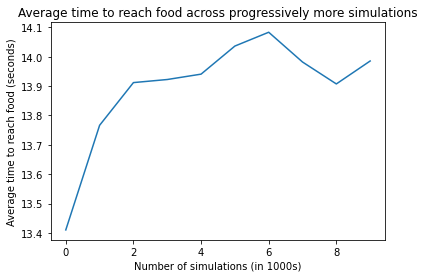

In [11]:
plt.plot(avg_time3)
plt.title('Average time to reach food across progressively more simulations')
plt.xlabel('Number of simulations (in 1000s)')
plt.ylabel('Average time to reach food (seconds)')

As shown in the above plot, the average time tends the ant takes to reach its food tends to converge to 14 seconds. This is also validated by the mean of the average time across all simulation sets. **Therefore, it takes 14 seconds on average for the ant to reach its food if it is located outside a boundary defined by $\big((x - 2.5) / 30\big)^2 + \big((x - 2.5) / 40\big)^2 < 1$ in coordinate system where the anthill is located at (x = 0cm, y = 0cm).**